In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Checking for NA/NULL values in dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Removing unnecessary COLUMNS

In [6]:
df = df.drop(['car_ID'],axis=1)

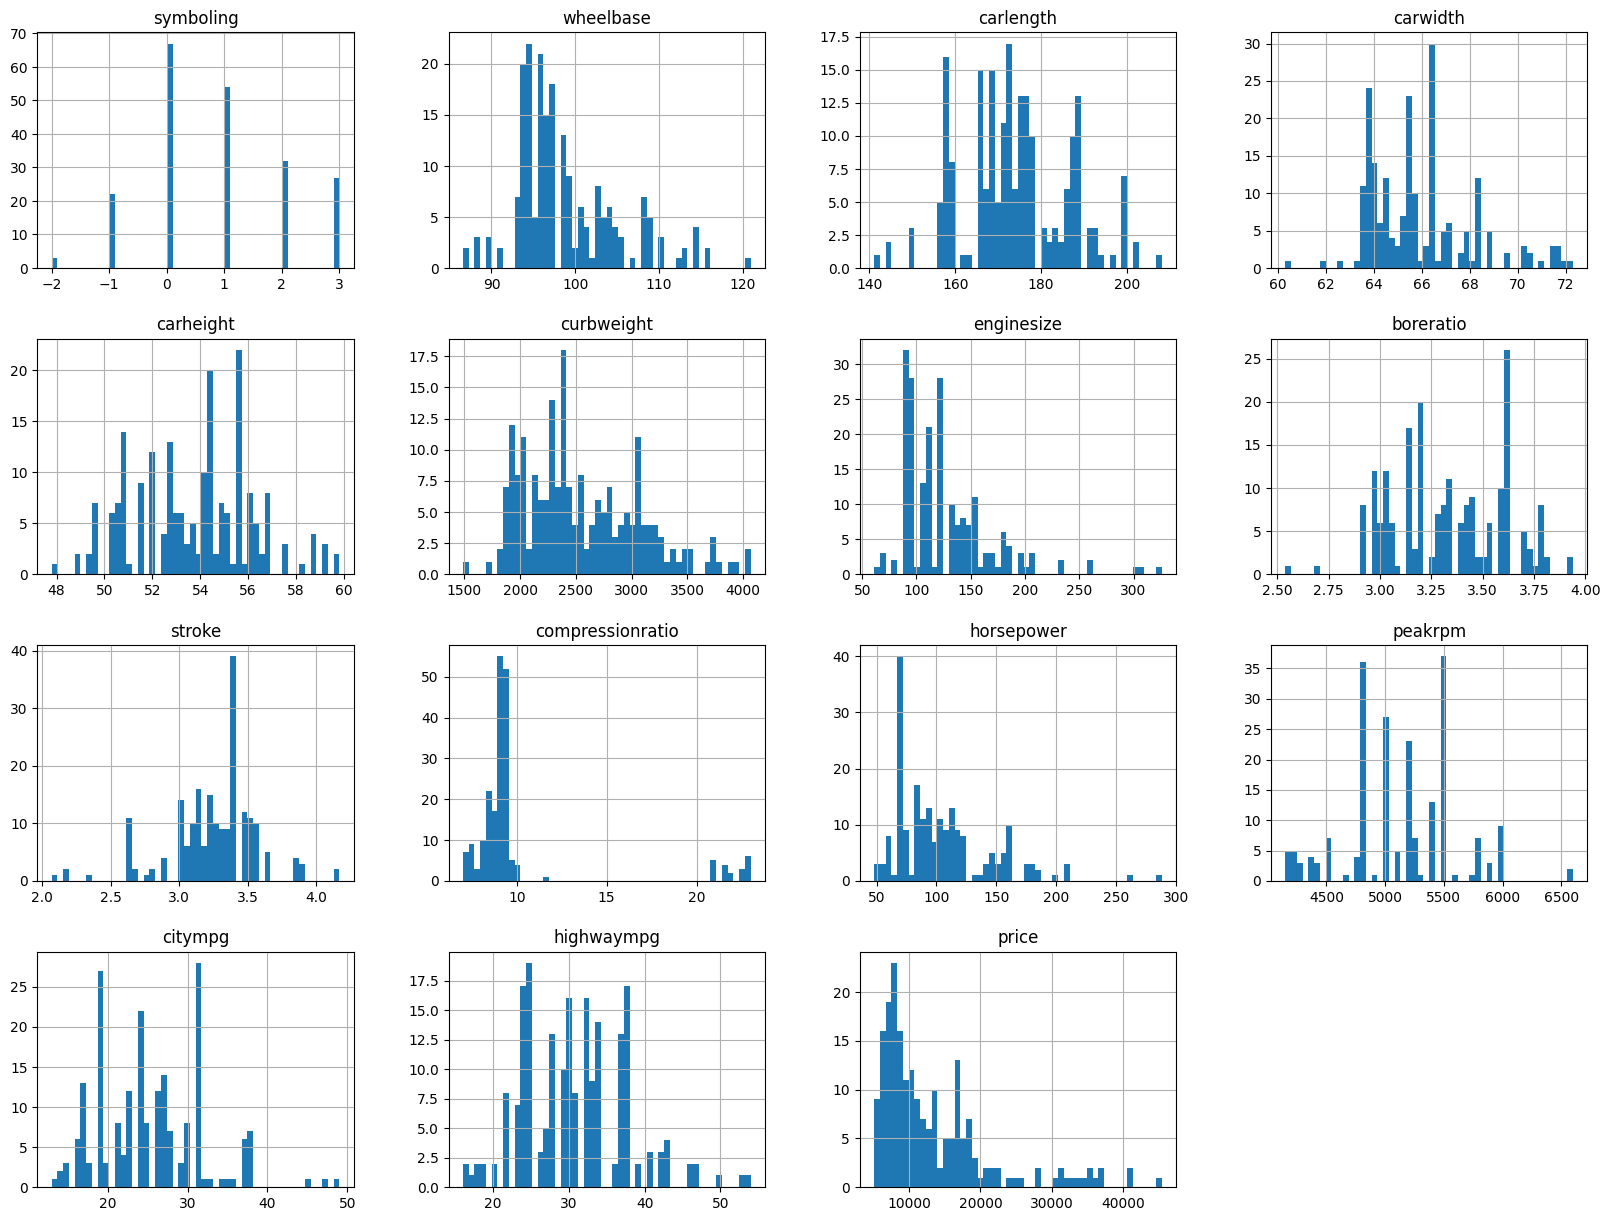

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df[['symboling','doornumber']], random_state=42)

In [9]:
car = strat_train_set.copy()

## Checking for correlation

In [10]:
corr_matrix = car.corr(numeric_only=True)

In [11]:
corr_matrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.530720,-0.366296,-0.237189,-0.536716,-0.235764,-0.097763,-0.124523,-0.010798,-0.190154,0.057628,0.259832,-0.018667,0.047080,-0.091698
wheelbase,-0.530720,1.000000,0.889453,0.811128,0.597219,0.787076,0.572105,0.496901,0.138564,0.228639,0.375996,-0.371073,-0.484991,-0.565805,0.589799
carlength,-0.366296,0.889453,1.000000,0.863378,0.502715,0.886023,0.689190,0.599742,0.122581,0.146938,0.576422,-0.288333,-0.671851,-0.720810,0.697794
carwidth,-0.237189,0.811128,0.863378,1.000000,0.311749,0.881541,0.745535,0.563032,0.165542,0.155846,0.638749,-0.250454,-0.656019,-0.709883,0.767283
carheight,-0.536716,0.597219,0.502715,0.311749,1.000000,0.309685,0.066622,0.173344,-0.069933,0.296762,-0.099996,-0.335908,-0.035548,-0.091539,0.144180
curbweight,-0.235764,0.787076,0.886023,0.881541,0.309685,1.000000,0.848040,0.650469,0.169263,0.118681,0.756974,-0.284902,-0.752658,-0.807016,0.836020
enginesize,-0.097763,0.572105,0.689190,0.745535,0.066622,0.848040,1.000000,0.592802,0.191338,-0.003873,0.825466,-0.255208,-0.654282,-0.691087,0.880233
boreratio,-0.124523,0.496901,0.599742,0.563032,0.173344,0.650469,0.592802,1.000000,-0.021708,-0.024355,0.592814,-0.240157,-0.598619,-0.602854,0.574615
stroke,-0.010798,0.138564,0.122581,0.165542,-0.069933,0.169263,0.191338,-0.021708,1.000000,0.187147,0.080269,-0.095339,-0.033099,-0.054713,0.070525
compressionratio,-0.190154,0.228639,0.146938,0.155846,0.296762,0.118681,-0.003873,-0.024355,0.187147,1.000000,-0.249542,-0.457906,0.360461,0.291867,0.032914


array([[<Axes: xlabel='carlength', ylabel='carlength'>,
        <Axes: xlabel='carwidth', ylabel='carlength'>,
        <Axes: xlabel='carheight', ylabel='carlength'>,
        <Axes: xlabel='curbweight', ylabel='carlength'>,
        <Axes: xlabel='enginesize', ylabel='carlength'>,
        <Axes: xlabel='horsepower', ylabel='carlength'>,
        <Axes: xlabel='price', ylabel='carlength'>],
       [<Axes: xlabel='carlength', ylabel='carwidth'>,
        <Axes: xlabel='carwidth', ylabel='carwidth'>,
        <Axes: xlabel='carheight', ylabel='carwidth'>,
        <Axes: xlabel='curbweight', ylabel='carwidth'>,
        <Axes: xlabel='enginesize', ylabel='carwidth'>,
        <Axes: xlabel='horsepower', ylabel='carwidth'>,
        <Axes: xlabel='price', ylabel='carwidth'>],
       [<Axes: xlabel='carlength', ylabel='carheight'>,
        <Axes: xlabel='carwidth', ylabel='carheight'>,
        <Axes: xlabel='carheight', ylabel='carheight'>,
        <Axes: xlabel='curbweight', ylabel='carheight'>,
 

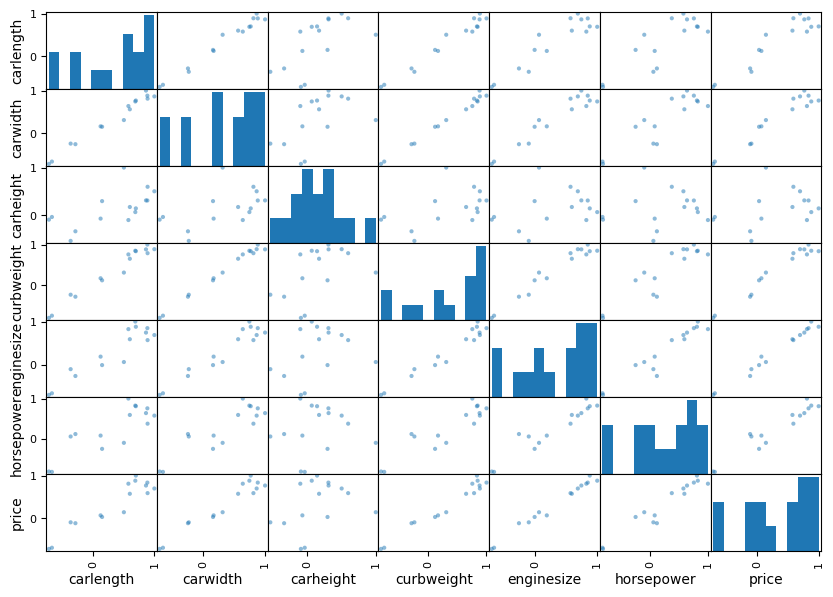

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(corr_matrix[['carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'price']],figsize=(10,7))

## The length and width of the car , EngineSize shows strong relation with price


<Axes: xlabel='carlength', ylabel='carwidth'>

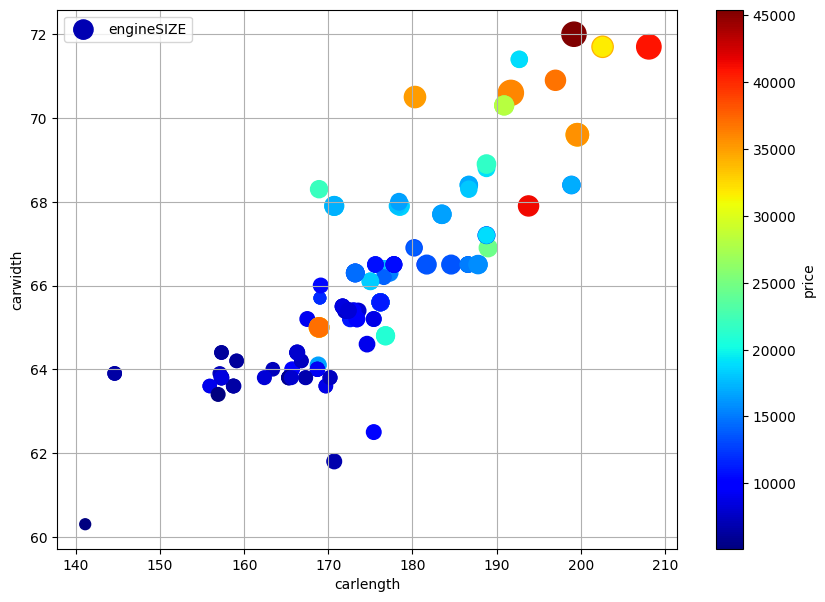

In [13]:
car.plot(kind='scatter',x='carlength',y='carwidth',grid=True,c='price',cmap='jet',s = car['enginesize'],label='engineSIZE',
         colorbar=True,legend=True, sharex=False, figsize=(10,7))

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_pipeline = make_pipeline(SimpleImputer(strategy='median'),StandardScaler()) 
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))

from sklearn.compose import make_column_selector


preprocessing = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline, make_column_selector(dtype_include=object)),
        ('num', num_pipeline, make_column_selector(dtype_include=np.number))
    ]
)


In [15]:
car_features = strat_train_set.drop(['price'],axis=1).copy()
car_label = strat_train_set['price'].copy()

In [16]:
car_prepared = make_pipeline(preprocessing).fit_transform(car_features)
car_prepared.shape

(164, 176)

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(car_features, car_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D415EB0260>),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D4167D02F0>)])),
                ('linearregression', LinearRegression())])

In [18]:
car_pred = lin_reg.predict(car_features)

In [19]:
from sklearn.metrics import root_mean_squared_error
lin_rms = root_mean_squared_error(car_label,car_pred)
lin_rms # Clearly model is overfitting

277.1843534981369

In [20]:
lin_reg.score(car_features,car_label)

0.9988873911275284

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

Rnd_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
Rnd_reg.fit(car_features, car_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D415EB0260>),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D4167D02F0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [22]:
X_test = strat_test_set.drop('price',axis=1).copy()
y_test = strat_test_set['price'].copy()

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_grid = {
    'randomforestregressor__n_estimators': randint(10, 1000),
    'randomforestregressor__max_features': [None, 'sqrt', 'log2', 0.5],  # Adjusted max_features values
    'randomforestregressor__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'randomforestregressor__min_samples_split': randint(2, 20),
    'randomforestregressor__min_samples_leaf': randint(1, 20),
    'randomforestregressor__bootstrap': [True, False]
}


# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=Rnd_reg, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(car_features, car_label)

# Access the best estimator
best_estimator = random_search.best_estimator_


In [24]:
best_estimator.score(X_test,y_test)

0.9274529440056608